In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('/content/drive/MyDrive/Practica 4/Student_Performance.csv')

In [76]:
# Codificar la variable categórica "Extracurricular Activities" como 1 para "yes" y 0 para "no"
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities']]
y = df['Performance Index']

# Agregar una columna de unos para el término de intercepción (b0)
X['Intercept'] = 1

# Establecer la proporción de entrenamiento y prueba
proporcion_entrenamiento = 0.8
num_ejemplos = len(X)
num_ejemplos_entrenamiento = int(num_ejemplos * proporcion_entrenamiento)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train = X.iloc[:num_ejemplos_entrenamiento]
y_train = y.iloc[:num_ejemplos_entrenamiento]
X_test = X.iloc[num_ejemplos_entrenamiento:]
y_test = y.iloc[num_ejemplos_entrenamiento:]

# Calcular los coeficientes mediante ecuaciones normales
coefficients = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# Obtener los coeficientes (β1, β2, β3, β4, β5, β0)
beta1 = coefficients[0]  # Coeficiente de Hours Studied
beta2 = coefficients[1]  # Coeficiente de Previous Scores
beta3 = coefficients[2]  # Coeficiente de Sleep Hours
beta4 = coefficients[3]  # Coeficiente de Sample Question Papers Practiced
beta5 = coefficients[4]  # Coeficiente de Extracurricular Activities
beta0 = coefficients[5]  # Término de intercepción

# Imprimir los coeficientes
print(f'Coeficiente β1: {beta1}')
print(f'Coeficiente β2: {beta2}')
print(f'Coeficiente β3: {beta3}')
print(f'Coeficiente β4: {beta4}')
print(f'Coeficiente β5: {beta5}')
print(f'Término de intercepción (β0): {beta0}')

Coeficiente β1: 2.8514829432704327
Coeficiente β2: 1.0180231911243487
Coeficiente β3: 0.47417894940788885
Coeficiente β4: 0.19139736625761453
Coeficiente β5: 0.6313064458714981
Término de intercepción (β0): -34.01047531973953


In [77]:
# Calcular las predicciones
y_pred = X_test.dot(coefficients)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - y_pred) ** 2).mean()

# Calcular el Coeficiente de Determinación (R²)
y_mean = y.mean()
ss_tot = ((y - y_mean) ** 2).sum()
ss_res = ((y - y_pred) ** 2).sum()
r2 = 1 - (ss_res / ss_tot)

# Imprimir las métricas de evaluación
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 4.247182985000924
R²: 0.9976985368494741


In [78]:
# Construir la fórmula de
MLR = f'Performance Index = {beta0:.2f} + {beta1:.2f} * Hours Studied + {beta2:.2f} * Previous Scores + {beta3:.2f} * Sleep Hours + {beta4:.2f} * Sample Question Papers Practiced + {beta5:.2f} * Extracurricular Activities'
# Imprimir el resultado de la predicción
print(f'Resultado de la predicción: {y_pred}')

Resultado de la predicción: 8000    24.681763
8001    33.728188
8002    61.356364
8003    72.038903
8004    76.208130
          ...    
9995    21.634961
9996    56.485114
9997    72.976072
9998    94.351680
9999    65.268450
Length: 2000, dtype: float64


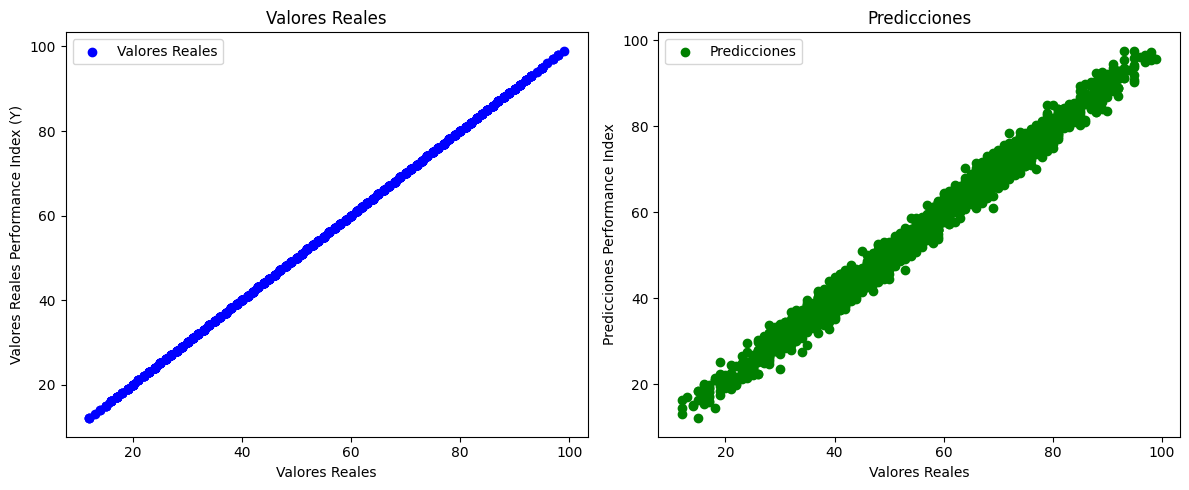

In [79]:
# Crear la figura para "la prediccion"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(y_test, y_test, color='blue', label='Valores Reales')
ax1.set_xlabel("Valores Reales")
ax1.set_ylabel("Valores Reales Performance Index (Y)")
ax1.set_title("Valores Reales")
ax1.legend()

ax2.scatter(y_test, y_pred, color='green', label='Predicciones')
ax2.set_xlabel("Valores Reales")
ax2.set_ylabel("Predicciones Performance Index")
ax2.set_title("Predicciones")
ax2.legend()

plt.tight_layout()
plt.show()